In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import kagglehub

# Download the CelebA dataset using kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')
print('Data source import complete.')

# Importing scikit-learn tools for splitting and evaluating the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing TensorFlow and Keras tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D

# Print confirmation
print('Libraries imported successfully.')


100%|██████████| 1.33G/1.33G [00:09<00:00, 157MB/s]

Extracting files...


Data source import complete.
Libraries imported successfully.


In [2]:
BASIC_PATH = jessicali9530_celeba_dataset_path
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')

In [3]:
LIST_ATTR_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')
DF_ATTR = pd.read_csv(BASIC_PATH + '/list_attr_celeba.csv', delimiter=',')
print(IMG_PATH, LIST_ATTR_PATH)
DF_ATTR.head()

/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [4]:
DF_PARTITION = pd.read_csv(BASIC_PATH + '/list_eval_partition.csv')

In [5]:
DF_ATTR.set_index('image_id', inplace=True)
DF_ATTR.replace(to_replace=-1, value=0, inplace=True)
DF_ATTR.shape

(202599, 40)

In [6]:
DF_PARTITION['partition'].value_counts().sort_index()

partition
0    162770
1     19867
2     19962
Name: count, dtype: int64

In [7]:
# prompt: hitung dan tampilkan jumlah total dataset diatas

total_dataset = DF_ATTR.shape[0]
print(f"Total dataset: {total_dataset}")

Total dataset: 202599


Contoh file duplikat:
169497.jpg
004341.jpg
170605.jpg
134995.jpg
161185.jpg
029109.jpg
056985.jpg
015484.jpg
Total file duplikat: 131


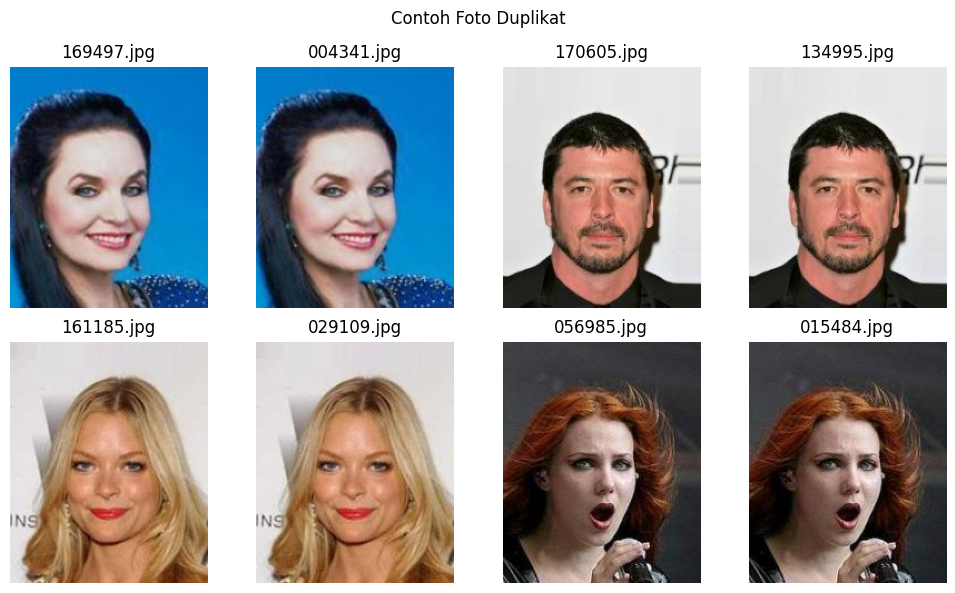

In [8]:
# Mengecek File Duplikat, Menghitung Jumlahnya dan Menampilkan 5 File Contoh
import hashlib
# Library yang digunakan : os dan hashlib

# Mencari semua file dengan ekstensi gambar dalam folder
image_files = [file for file in os.listdir(IMG_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Menggunakan dictionary untuk menyimpan hash nilai dan daftar file dengan hash yang sama
duplicate_files = {}

# Memeriksa setiap file gambar
for file_name in image_files:
    file_path = os.path.join(IMG_PATH, file_name)
    with open(file_path, 'rb') as f:
        file_hash = hashlib.md5(f.read()).hexdigest()

    if file_hash not in duplicate_files:
        duplicate_files[file_hash] = [file_name]
    else:
        duplicate_files[file_hash].append(file_name)

# Menghitung total file yang duplikat
total_duplicate_files = sum(len(files) - 1 for files in duplicate_files.values())

# Menampilkan 8 contoh nama file yang duplikat
print("Contoh file duplikat:")
count = 0
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        for file_name in file_list[:8]:
            count += 1
            print(file_name)
            if count == 8:
                break
    if count == 8:
        break

# Menampilkan total file yang duplikat
print(f"Total file duplikat: {total_duplicate_files}")

# Mengumpulkan 8 contoh file duplikat
duplicate_examples = []
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        duplicate_examples.extend(file_list[:8])
    if len(duplicate_examples) >= 10:
        break

# Menampilkan 8 foto duplikat dengan judul sebagai nama file
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(duplicate_examples):
        file_name = duplicate_examples[i]
        file_path = os.path.join(IMG_PATH, file_name)
        image = plt.imread(file_path)
        ax.imshow(image)
        ax.set_title(file_name)
        plt.suptitle('Contoh Foto Duplikat')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [9]:
# Membuat List Nama File Foto untuk Join dengan Nama File pada File list_attribute.csv
import glob
# Library yang digunakan : glob dan pandas

# Tentukan pola nama file foto (misal: JPEG, PNG)
file_ekstensi = '*.jpg' # Ganti dengan ekstensi file gambar yang sesuai

# Tentukan direktori tempat file-file gambar berada
direktori_foto = IMG_PATH

# Mendapatkan list nama file
nama_file = glob.glob(direktori_foto + '/' + file_ekstensi)

# List nama file dijadikan dataframe
data = pd.DataFrame(nama_file, columns = ['image_id'])

# Menampilkan dataframe
data.head()


image_id
0  /root/.cache/kagglehub/datasets/jessicali9530/...
1  /root/.cache/kagglehub/datasets/jessicali9530/...
2  /root/.cache/kagglehub/datasets/jessicali9530/...
3  /root/.cache/kagglehub/datasets/jessicali9530/...
4  /root/.cache/kagglehub/datasets/jessicali9530/...

In [10]:
# Membuang karakter pertama hingga sebelum nama file
data['image_id'] = data['image_id'].str.split('\\').str[-1]
data.head()

image_id
0  /root/.cache/kagglehub/datasets/jessicali9530/...
1  /root/.cache/kagglehub/datasets/jessicali9530/...
2  /root/.cache/kagglehub/datasets/jessicali9530/...
3  /root/.cache/kagglehub/datasets/jessicali9530/...
4  /root/.cache/kagglehub/datasets/jessicali9530/...

In [11]:
# Load Dataset 'list_attribute.csv' tampilkan juga nama file

print(f"File yang digunakan: {LIST_ATTR_PATH}")
df_attr = pd.read_csv(LIST_ATTR_PATH)
df_attr.head()

File yang digunakan: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [12]:
# prompt: # Cek Informasi pada DataFrame

# Cek Informasi pada DataFrame DF_ATTR
print("Informasi DataFrame DF_ATTR:")
print(DF_ATTR.info())
print("\n")

# Cek Informasi pada DataFrame DF_PARTITION
print("Informasi DataFrame DF_PARTITION:")
print(DF_PARTITION.info())
print("\n")

# Deskripsi statistik DF_ATTR
print("Deskripsi Statistik DF_ATTR:")
print(DF_ATTR.describe())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_ATTR:")
print(DF_ATTR.isnull().sum())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_PARTITION:")
print(DF_PARTITION.isnull().sum())
print("\n")

# Melihat korelasi antar kolom pada DF_ATTR
print("Korelasi Antar Kolom DF_ATTR:")
print(DF_ATTR.corr())
print("\n")

# Melihat nilai unik pada kolom 'partition' di DF_PARTITION
print("Nilai Unik pada Kolom 'partition' di DF_PARTITION:")
print(DF_PARTITION['partition'].unique())
print("\n")

Informasi DataFrame DF_ATTR:
<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses    

In [13]:
# prompt: # Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Gabungkan 'data' dan 'DF_ATTR' berdasarkan 'image_id'
merged_data = pd.merge(data, DF_ATTR, left_on='image_id', right_index=True, how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join:")
merged_data.head()

Hasil Inner Join:


Empty DataFrame
Columns: [image_id, 5_o_Clock_Shadow, Arched_Eyebrows, Attractive, Bags_Under_Eyes, Bald, Bangs, Big_Lips, Big_Nose, Black_Hair, Blond_Hair, Blurry, Brown_Hair, Bushy_Eyebrows, Chubby, Double_Chin, Eyeglasses, Goatee, Gray_Hair, Heavy_Makeup, High_Cheekbones, Male, Mouth_Slightly_Open, Mustache, Narrow_Eyes, No_Beard, Oval_Face, Pale_Skin, Pointy_Nose, Receding_Hairline, Rosy_Cheeks, Sideburns, Smiling, Straight_Hair, Wavy_Hair, Wearing_Earrings, Wearing_Hat, Wearing_Lipstick, Wearing_Necklace, Wearing_Necktie, Young]
Index: []

[0 rows x 41 columns]

In [14]:
# prompt: # Cek Jumlah Baris dan kolom yang telah Join Inner

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(merged_data.shape)

Jumlah baris dan kolom setelah inner join:
(0, 41)


In [15]:
# prompt: # join the partition with the attributes

# Gabungkan 'merged_data' dan 'DF_PARTITION' berdasarkan 'image_id'
final_data = pd.merge(merged_data, DF_PARTITION, left_on='image_id', right_on='image_id', how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join antara merged_data dan DF_PARTITION:")
final_data.head()

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(final_data.shape)
DF_PARTITION.head()

Hasil Inner Join antara merged_data dan DF_PARTITION:
Jumlah baris dan kolom setelah inner join:
(0, 42)


image_id  partition
0  000001.jpg          0
1  000002.jpg          0
2  000003.jpg          0
3  000004.jpg          0
4  000005.jpg          0

In [16]:
# Read the attributes csv files in a dataframe format.
df = pd.read_csv(FEATURE_PATH, usecols=['image_id','Male'])
df = df.sample(n=22000, random_state = 42).reset_index(drop=True)

# Reset the columns values to categorical./
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(10)

<ipython-input-16-2a02771cbc01>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Male'] == -1,'Male'] = "Female"


image_id  Gender
0  093242.jpg    Male
1  121414.jpg  Female
2  010625.jpg    Male
3  082524.jpg  Female
4  073193.jpg  Female
5  176200.jpg  Female
6  041602.jpg  Female
7  065466.jpg    Male
8  019028.jpg    Male
9  164498.jpg  Female

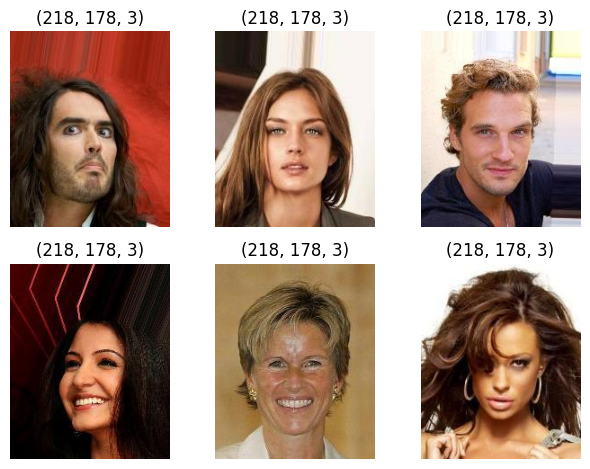

In [17]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Display Multiple Sample Images.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')

plt.tight_layout()
plt.show()

Gender
Female    12760
Male       9240
Name: count, dtype: int64


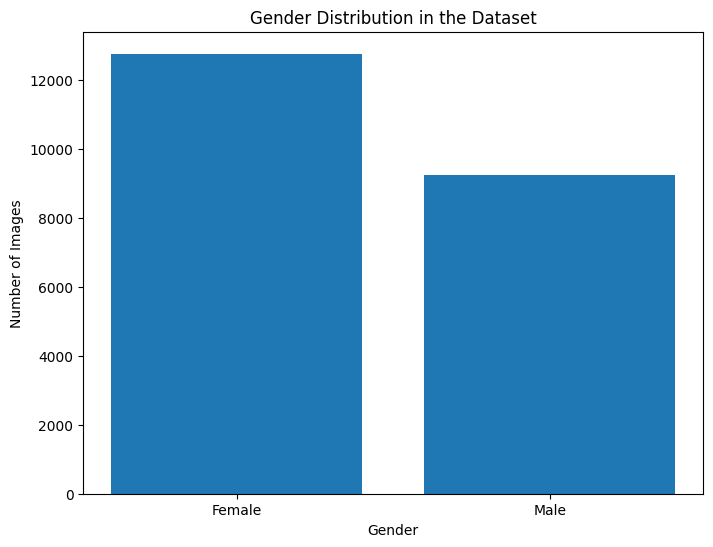

In [18]:
# prompt: # Get the category distribution.

# Get the category distribution.
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Visualize the category distribution (optional).
plt.figure(figsize=(8, 6))
plt.bar(gender_distribution.index, gender_distribution.values)
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()

Gender
Female    12760
Male       9240
Name: count, dtype: int64
Gender
Female    9240
Male      9240
Name: count, dtype: int64


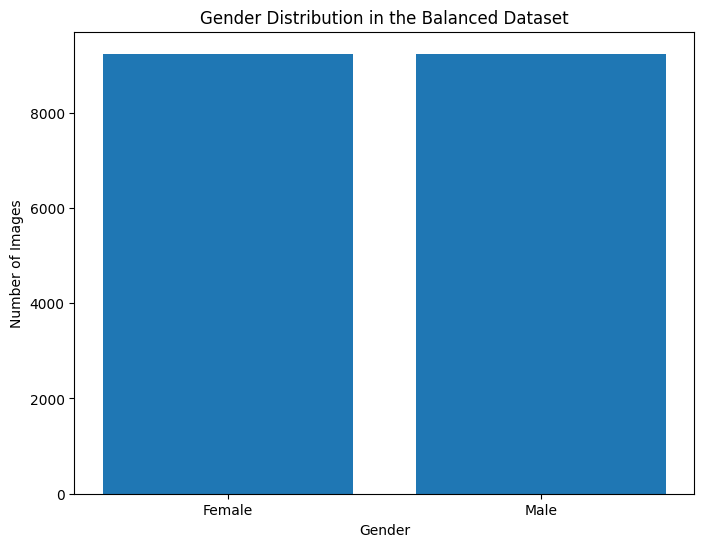

In [19]:
# prompt: buat distribution gender menjadi seimbang berdasarkan code diatas

# Get the category distribution.
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Calculate the minimum number of samples for each class
min_samples = min(gender_distribution)

# Create balanced datasets for each class
balanced_df = pd.DataFrame()
for gender in gender_distribution.index:
  temp_df = df[df['Gender'] == gender].sample(n=min_samples, random_state=42)
  balanced_df = pd.concat([balanced_df, temp_df])

# Reset the index of the balanced dataframe
balanced_df = balanced_df.reset_index(drop=True)


# Get the new category distribution.
new_gender_distribution = balanced_df['Gender'].value_counts()
print(new_gender_distribution)

# Visualize the new category distribution (optional).
plt.figure(figsize=(8, 6))
plt.bar(new_gender_distribution.index, new_gender_distribution.values)
plt.title('Gender Distribution in the Balanced Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()

df = balanced_df

<Axes: xlabel='Gender'>

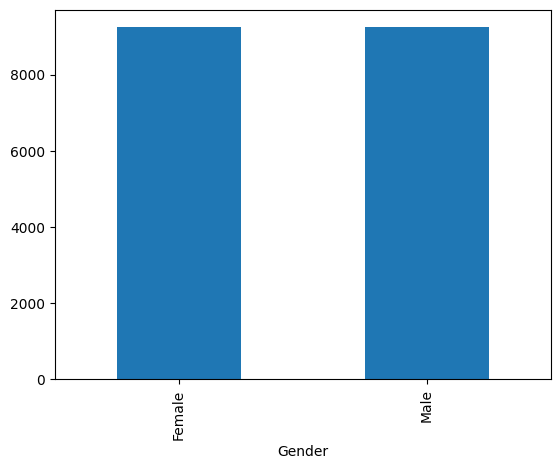

In [20]:
df["Gender"].value_counts().plot.bar()

# Splitting Dataset

In [21]:
train_df, test_df = train_test_split(df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [22]:
print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  12936
Total Test Sample Images :  3714
Total Validation Sample Images :  1830


In [23]:
IMAGE_SIZE = (218, 178)
BATCH_SIZE = 128

**Augmentasi Data**

In [24]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)
# Generate Validation Images Data Generator.
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 12936 validated image filenames belonging to 2 classes.
Found 1830 validated image filenames belonging to 2 classes.


In [25]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 3714 validated image filenames.


# VISUALISASI DATA HASIL AUGMENTASI

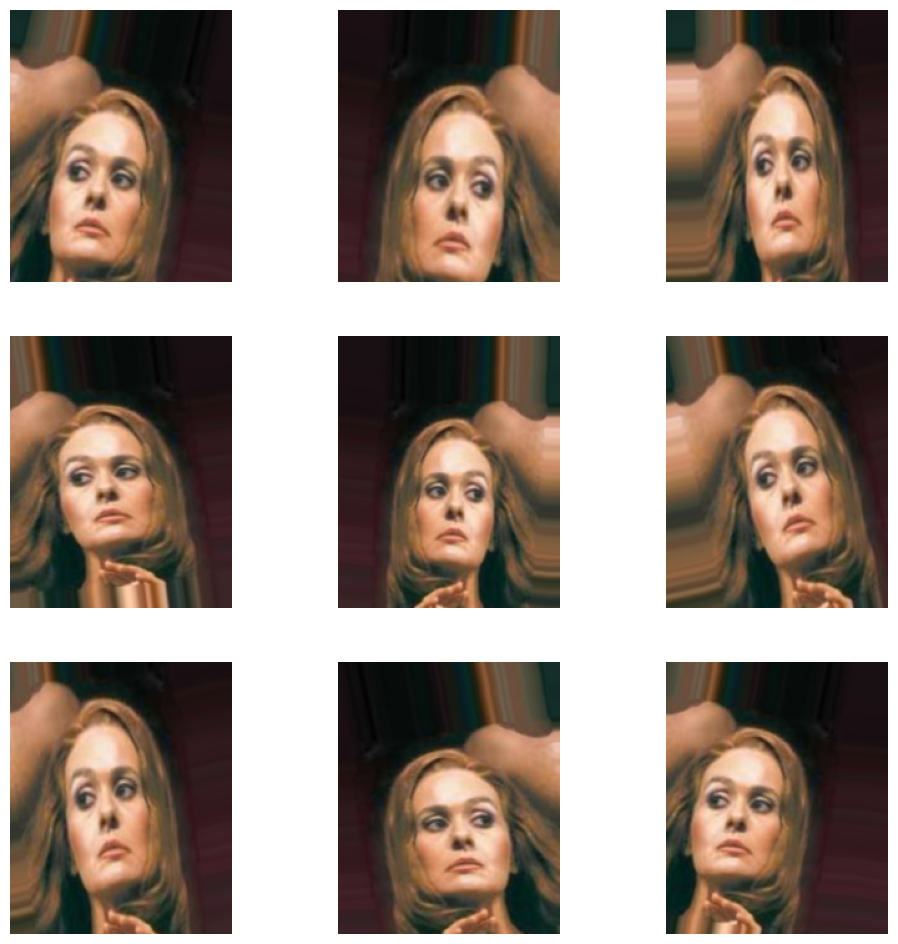

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari train_generator
x_batch, y_batch = next(train_generator)

# Ambil satu gambar dari batch untuk augmentasi dan visualisasi
sample_image = x_batch[1]

# Visualisasi hasil augmentasi pada satu gambar
plt.figure(figsize=(12, 12))
for i in range(9):  # tampilkan 9 gambar
    # Terapkan transformasi acak dari ImageDataGenerator pada gambar
    augmented_image = train_datagen.random_transform(sample_image)  # Gunakan objek ImageDataGenerator
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis("off")
plt.show()


# Pembuatan MODEL

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Import Pre-trained Model Imagenet

In [28]:
# Transfer Learning dengan ResNet50
base_resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape= IMAGE_SIZE + (3,))

for layer in base_resnet_model.layers[-5:]:  # Unfreeze 5 layer terakhir
    layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Pembuatan layer terakhir

In [29]:
# Membuat Arsitektur Fully Connected
resnet_model = Sequential([
    base_resnet_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation="softmax")
])


# Hyperparameter

In [33]:
# Hyper parameter
base_learning_rate = 0.00001
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**Callback untuk stop early**

In [34]:
# Callbacks
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)
callbacks = [earlystop, learning_rate_reduction]

**Training Model**

In [35]:
# Training Model
history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=len(validation_df) // BATCH_SIZE,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    epochs=10,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 - 227s - 2s/step - accuracy: 0.8512 - loss: 0.3574 - val_accuracy: 0.9364 - val_loss: 0.1738 - learning_rate: 1.0000e-05
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 - 7s - 69ms/step - accuracy: 0.8984 - loss: 0.2401 - val_accuracy: 1.0000 - val_loss: 0.0343 - learning_rate: 1.0000e-05
Epoch 3/10
101/101 - 205s - 2s/step - accuracy: 0.9157 - loss: 0.2219 - val_accuracy: 0.9481 - val_loss: 0.1509 - learning_rate: 1.0000e-05
Epoch 4/10
101/101 - 1s - 8ms/step - accuracy: 0.9375 - loss: 0.1841 - val_accuracy: 0.9737 - val_loss: 0.1064 - learning_rate: 1.0000e-05
Epoch 5/10
101/101 - 148s - 1s/step - accuracy: 0.9345 - loss: 0.1749 - val_accuracy: 0.9515 - val_loss: 0.1251 - learning_rate: 1.0000e-05
Epoch 6/10
101/101 - 1s - 8ms/step - accuracy: 0.9609 - loss: 0.1388 - val_accuracy: 1.0000 - val_loss: 0.0347 - learning_rate: 1.0000e-05
Epoch 7/10
101/101 - 149s - 1s/step - accuracy: 0.9475 - loss: 0.1401 - val_accuracy: 0.9604 - val_loss: 0.1091 - learning_rate: 1.0000e-05


In [36]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 7, 6, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,631,592 (288.51 MB)

 Trainable params: 24,843,810 (94.77 MB)

 Non-trainable params: 1,100,160 (4.20 MB)

 Optimizer params: 49,687,622 (189.54 MB)

In [37]:
resnet_model.save("resnet.h5")

# Testing Model

**Confusion Matrix**

In [38]:
predict = resnet_model.predict(test_generator, steps=int(np.ceil(len(test_df) / BATCH_SIZE)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 427ms/step


In [39]:
prediction = predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [40]:
print(train_df['Gender'].value_counts())

Gender
Female    6491
Male      6445
Name: count, dtype: int64


In [41]:
test_df

image_id  Gender Prediction
15926  028707.jpg    Male       Male
6534   086523.jpg  Female       Male
9159   053600.jpg  Female     Female
6968   184015.jpg  Female     Female
1701   084930.jpg  Female     Female
...           ...     ...        ...
10929  046732.jpg    Male       Male
13184  018676.jpg    Male       Male
789    126883.jpg  Female     Female
13939  088034.jpg    Male       Male
4755   086222.jpg  Female     Female

[3714 rows x 3 columns]

In [42]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

array([[1797,   61],
       [  97, 1759]])

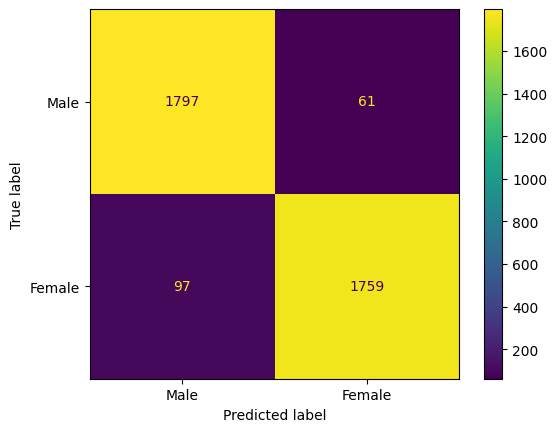

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

**Evaluasi**

              precision    recall  f1-score   support

        Male       0.97      0.95      0.96      1856
      Female       0.95      0.97      0.96      1858

    accuracy                           0.96      3714
   macro avg       0.96      0.96      0.96      3714
weighted avg       0.96      0.96      0.96      3714



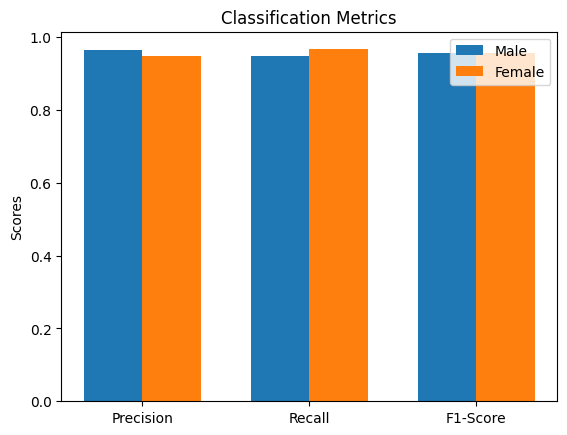

In [48]:
# prompt: print matrix evaluasinya

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming 'test_df' and 'prediction' are defined as in your original code

# Generate classification report
report = classification_report(test_df['Gender'], test_df['Prediction'], target_names=labels, output_dict=True)

# Print the classification report
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names=labels))

# Extract precision, recall, and F1-score for each class
male_precision = report['Male']['precision']
male_recall = report['Male']['recall']
male_f1_score = report['Male']['f1-score']

female_precision = report['Female']['precision']
female_recall = report['Female']['recall']
female_f1_score = report['Female']['f1-score']

# Create a bar chart
metrics = ['Precision', 'Recall', 'F1-Score']
male_values = [male_precision, male_recall, male_f1_score]
female_values = [female_precision, female_recall, female_f1_score]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, male_values, width, label='Male')
rects2 = ax.bar([i + width for i in x], female_values, width, label='Female')

ax.set_ylabel('Scores')
ax.set_title('Classification Metrics')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [49]:
# Matrix Evaluasi
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names = ['Male', 'Female']))

# Code Modif from Chat GPT

              precision    recall  f1-score   support

        Male       0.97      0.95      0.96      1856
      Female       0.95      0.97      0.96      1858

    accuracy                           0.96      3714
   macro avg       0.96      0.96      0.96      3714
weighted avg       0.96      0.96      0.96      3714



**Visualisasi Grafik pelatihan dan loss**

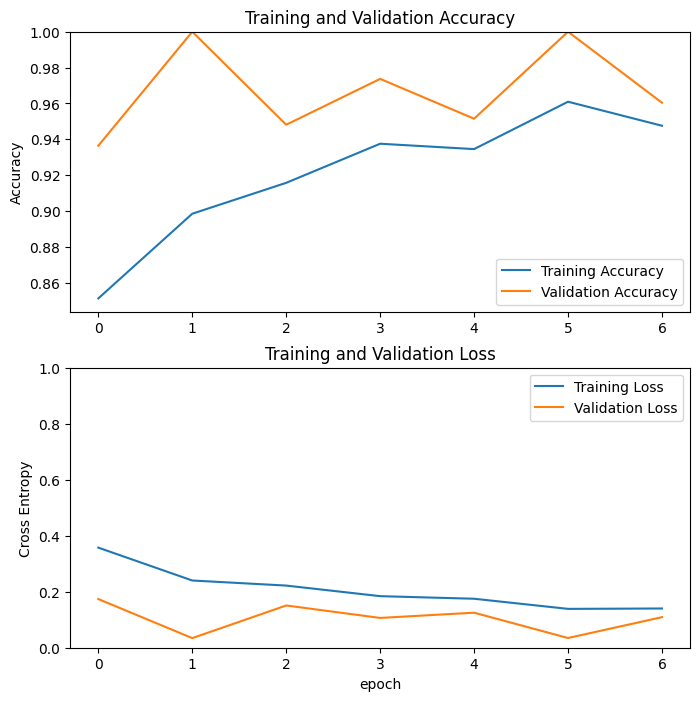

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [51]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_woman_df = wrong_df[wrong_df['Gender'] == 'Male']
wrong_woman_df.head()

image_id Gender Prediction
17716  004560.jpg   Male     Female
9829   149730.jpg   Male     Female
10316  066089.jpg   Male     Female
14307  128745.jpg   Male     Female
16953  110805.jpg   Male     Female

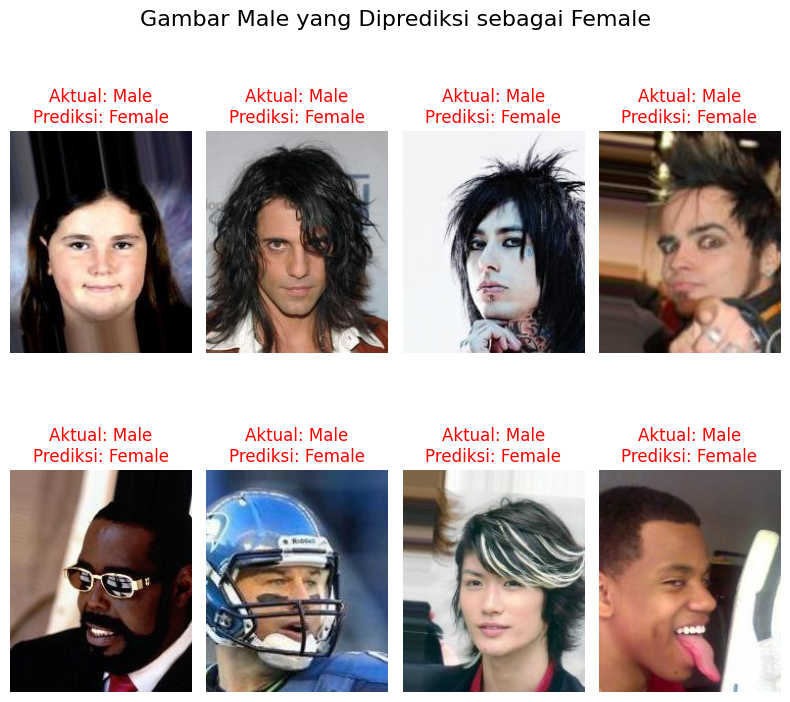

In [52]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_woman_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Male yang Diprediksi sebagai Female", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [53]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_male_df = wrong_df[wrong_df['Gender'] == 'Female']
wrong_male_df.head()

image_id  Gender Prediction
6534  086523.jpg  Female       Male
5845  067711.jpg  Female       Male
5187  149825.jpg  Female       Male
344   054114.jpg  Female       Male
4694  147130.jpg  Female       Male

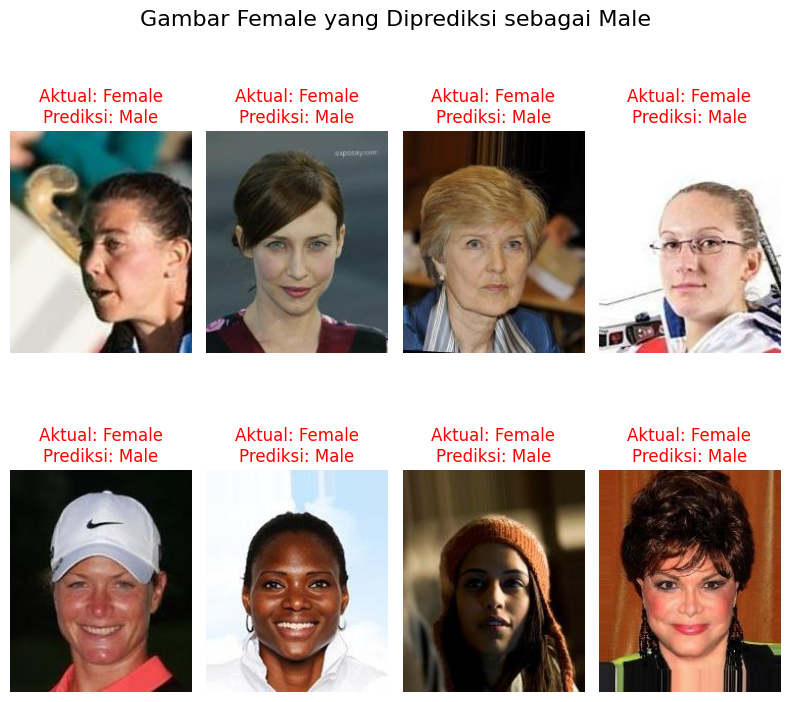

In [54]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_male_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Female yang Diprediksi sebagai Male", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [55]:
gender_target = {0: 'Female', 1: 'Male'}

def img_to_display(filename):
    # inspired on this kernel:
    # https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
    # credits to stassl :)

    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)

    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def display_result(filename, prediction, target):
    '''
    Display the results in HTML

    '''

    gender = 'Male'
    gender_icon = "https://i.imgur.com/nxWan2u.png"

    if prediction[1] <= 0.5:
        gender_icon = "https://i.imgur.com/oAAb8rd.png"
        gender = 'Female'

    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">{}</h3> <br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real Target: {}</p> <br><br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , gender_icon
               , gender
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               ,  gender_target[target]
               , filename.split('/')[-1]
               )

    display(HTML(display_html))

In [56]:
def gender_prediction(filename):
    '''
    predict the gender

    input:
        filename: str of the file name

    return:
        array of the prob of the targets.

    '''

    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)

    # prediction
    result = resnet_model.predict(im)
    prediction = np.argmax(result)

    return result

Saving 4.jpg to 4.jpg
User uploaded file "4.jpg" with length 60055 bytes


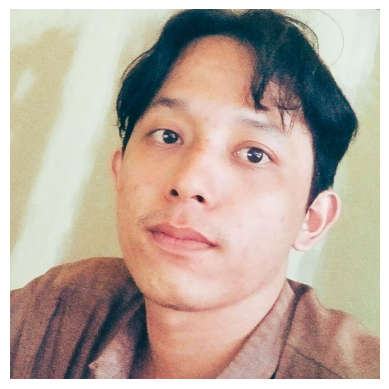

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: Male


In [72]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

#@title Gender Classification from Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Save the uploaded image temporarily
  image_path = '/content/' + fn
  with open(image_path, 'wb') as f:
    f.write(uploaded[fn])

  # Load the image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Resize and normalize the image
  im = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
  im = np.expand_dims(im, axis=0)

  # Make a prediction
  result = resnet_model.predict(im)
  prediction = np.argmax(result)

  if prediction == 0:
    print("Prediction: Female")
  else:
    print("Prediction: Male")


Saving 3.jpeg to 3 (1).jpeg
User uploaded file "3 (1).jpeg" with length 9606 bytes


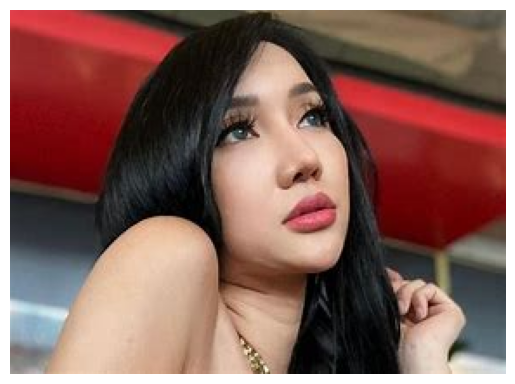

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Female


In [73]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

#@title Gender Classification from Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Save the uploaded image temporarily
  image_path = '/content/' + fn
  with open(image_path, 'wb') as f:
    f.write(uploaded[fn])

  # Load the image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Resize and normalize the image
  im = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
  im = np.expand_dims(im, axis=0)

  # Make a prediction
  result = resnet_model.predict(im)
  prediction = np.argmax(result)

  if prediction == 0:
    print("Prediction: Female")
  else:
    print("Prediction: Male")


Saving 1.png to 1 (1).png
User uploaded file "1 (1).png" with length 4942 bytes


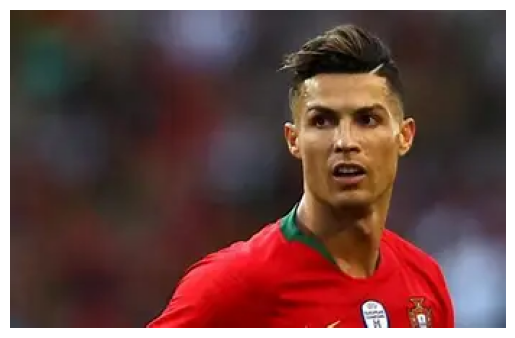

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Male


In [74]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

#@title Gender Classification from Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Save the uploaded image temporarily
  image_path = '/content/' + fn
  with open(image_path, 'wb') as f:
    f.write(uploaded[fn])

  # Load the image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Resize and normalize the image
  im = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
  im = np.expand_dims(im, axis=0)

  # Make a prediction
  result = resnet_model.predict(im)
  prediction = np.argmax(result)

  if prediction == 0:
    print("Prediction: Female")
  else:
    print("Prediction: Male")


Saving 2.jpeg to 2 (1).jpeg
User uploaded file "2 (1).jpeg" with length 8955 bytes


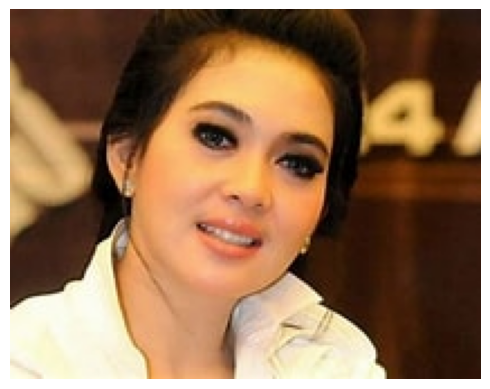

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: Female


In [76]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

#@title Gender Classification from Uploaded Image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Save the uploaded image temporarily
  image_path = '/content/' + fn
  with open(image_path, 'wb') as f:
    f.write(uploaded[fn])

  # Load the image
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Resize and normalize the image
  im = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
  im = np.expand_dims(im, axis=0)

  # Make a prediction
  result = resnet_model.predict(im)
  prediction = np.argmax(result)

  if prediction == 0:
    print("Prediction: Female")
  else:
    print("Prediction: Male")


In [69]:
# prompt: print final training accuracy dan final validation akurasinya

print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Final Training Accuracy: 0.9475327730178833
Final Validation Accuracy: 0.9603794813156128
